In [49]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 42kB/s 


In [2]:
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt


# **load dataset**

In [47]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
digits = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

In [48]:
digits = digits.astype('float') / 255

In [11]:
index = np.where(y == 4)
x_subset = x[index]
x_subset.shape

# **GAN**

In [40]:
# a model which can judge whether a pic is real or faked
# input shape (None, 28, 28, 1)
# output shape (None, 1)
discriminator = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(64, 3, (2,2), input_shape=(28, 28, 1)),
     tf.keras.layers.LeakyReLU(),
     tf.keras.layers.BatchNormalization(),

     tf.keras.layers.Conv2D(128, 5, (2,2)),
     tf.keras.layers.LeakyReLU(),
     tf.keras.layers.BatchNormalization(),

     tf.keras.layers.Conv2D(256, 5, (2,2)),
     tf.keras.layers.LeakyReLU(),
     tf.keras.layers.BatchNormalization(),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

opt = tf.keras.optimizers.Adam(lr=2e-4, beta_1=0.5)
discriminator.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 13, 13, 64)        640       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 5, 5, 128)         0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 5, 5, 128)         512       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 256)        

In [41]:
# from a real number, generate a faked picture.
# input shape (None, 1)
# output shape (None , 28, 28, 1)
generator = tf.keras.models.Sequential(
    [
     tf.keras.layers.Dense(256, activation='relu', input_shape=(1,)),
     tf.keras.layers.Reshape((1, 1, 256)),
     
     tf.keras.layers.Conv2DTranspose(256, 5, activation='relu'),
     tf.keras.layers.BatchNormalization(),

     tf.keras.layers.Conv2DTranspose(128, 5, activation='relu'),
     tf.keras.layers.BatchNormalization(),

     tf.keras.layers.Conv2DTranspose(64, 5, strides=(2, 2), activation='relu'),
     tf.keras.layers.BatchNormalization(),

     tf.keras.layers.Conv2DTranspose(32, 5, activation='relu'),
     tf.keras.layers.BatchNormalization(),

     
     tf.keras.layers.Conv2DTranspose(1, 4, activation='sigmoid')
    
    ]
)

generator.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               512       
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 1, 256)         0         
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 5, 5, 256)         1638656   
_________________________________________________________________
batch_normalization_10 (Batc (None, 5, 5, 256)         1024      
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 9, 9, 128)         819328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 9, 9, 128)         512       
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 21, 21, 64)       

In [42]:
input_tensor = tf.keras.layers.Input(shape=(1,))
gen_out = generator(input_tensor)
disc_out = discriminator(gen_out)

gan = tf.keras.models.Model(input_tensor, disc_out)
discriminator.trainable=False
gan.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
gan.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 28, 28, 1)         2717025   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1027073   
Total params: 3,744,098
Trainable params: 2,716,065
Non-trainable params: 1,028,033
_________________________________________________________________


In [78]:
epochs = 100
batch_size=256
steps_per_epoch = int(2 * digits.shape[0] / batch_size)


In [76]:
from tqdm import tqdm

100%|██████████| 546/546 [00:40<00:00, 13.53it/s]


epoch 10 step 545 gan loss:  0.02373643033206463     discriminator acc:  1.0


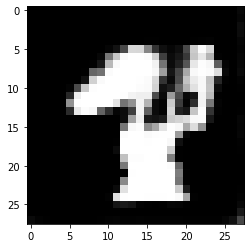

100%|██████████| 546/546 [00:39<00:00, 13.87it/s]


epoch 11 step 545 gan loss:  0.023268993943929672     discriminator acc:  0.5


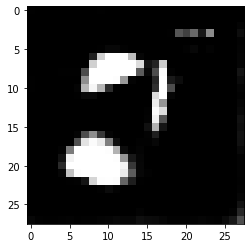

100%|██████████| 546/546 [00:39<00:00, 13.92it/s]


epoch 12 step 545 gan loss:  0.06003856658935547     discriminator acc:  1.0


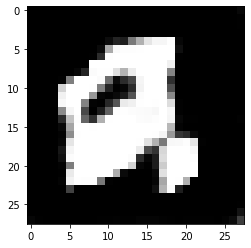

100%|██████████| 546/546 [00:40<00:00, 13.56it/s]


epoch 13 step 545 gan loss:  0.007591581903398037     discriminator acc:  1.0


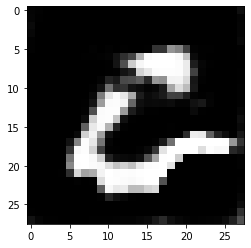

100%|██████████| 546/546 [00:39<00:00, 13.82it/s]


epoch 14 step 545 gan loss:  0.001541206263937056     discriminator acc:  1.0


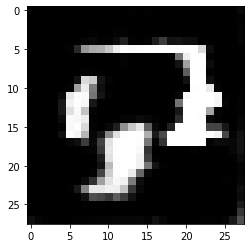

100%|██████████| 546/546 [00:38<00:00, 14.09it/s]


epoch 15 step 545 gan loss:  0.0029809102416038513     discriminator acc:  1.0


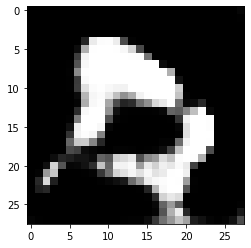

100%|██████████| 546/546 [00:39<00:00, 13.82it/s]


epoch 16 step 545 gan loss:  0.007917487062513828     discriminator acc:  0.5


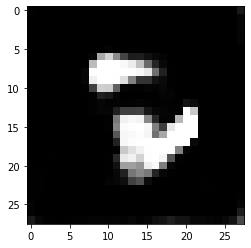

100%|██████████| 546/546 [00:40<00:00, 13.61it/s]


epoch 17 step 545 gan loss:  0.5240346193313599     discriminator acc:  0.921875


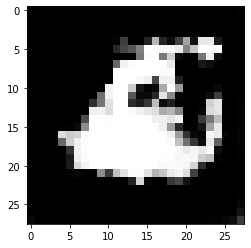

100%|██████████| 546/546 [00:39<00:00, 13.88it/s]


epoch 18 step 545 gan loss:  0.004372261930257082     discriminator acc:  0.5


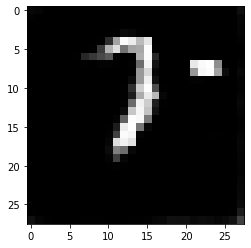

100%|██████████| 546/546 [00:39<00:00, 13.84it/s]


epoch 19 step 545 gan loss:  0.007472319062799215     discriminator acc:  1.0


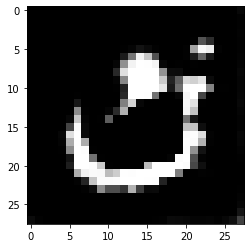

100%|██████████| 546/546 [00:39<00:00, 13.81it/s]


epoch 20 step 545 gan loss:  0.002150466665625572     discriminator acc:  1.0


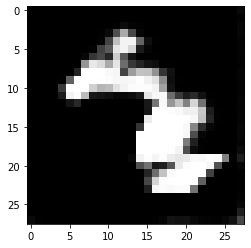

100%|██████████| 546/546 [00:40<00:00, 13.62it/s]


epoch 21 step 545 gan loss:  0.008334816433489323     discriminator acc:  1.0


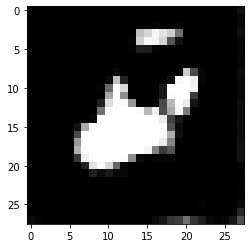

100%|██████████| 546/546 [00:40<00:00, 13.51it/s]


epoch 22 step 545 gan loss:  0.014385712333023548     discriminator acc:  1.0


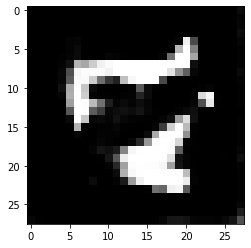

100%|██████████| 546/546 [00:40<00:00, 13.55it/s]


epoch 23 step 545 gan loss:  0.29056939482688904     discriminator acc:  0.98046875


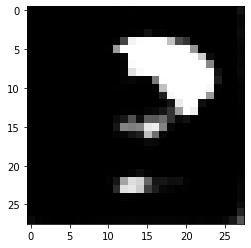

100%|██████████| 546/546 [00:39<00:00, 13.83it/s]


epoch 24 step 545 gan loss:  1.8578712940216064     discriminator acc:  1.0


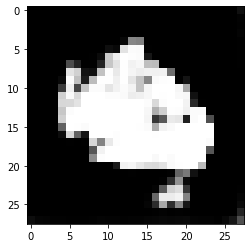

100%|██████████| 546/546 [00:38<00:00, 14.12it/s]


epoch 25 step 545 gan loss:  0.7635881900787354     discriminator acc:  1.0


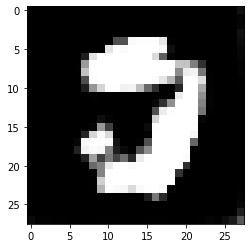

100%|██████████| 546/546 [00:39<00:00, 13.94it/s]


epoch 26 step 545 gan loss:  10.02125358581543     discriminator acc:  1.0


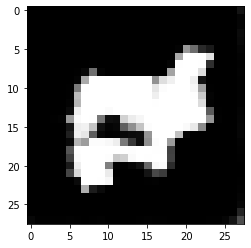

100%|██████████| 546/546 [00:39<00:00, 13.70it/s]


epoch 27 step 545 gan loss:  2.0017378330230713     discriminator acc:  1.0


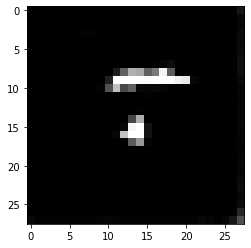

100%|██████████| 546/546 [00:39<00:00, 13.86it/s]


epoch 28 step 545 gan loss:  0.28249025344848633     discriminator acc:  1.0


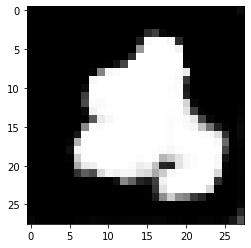

100%|██████████| 546/546 [00:39<00:00, 13.72it/s]


epoch 29 step 545 gan loss:  0.11266280710697174     discriminator acc:  0.70703125


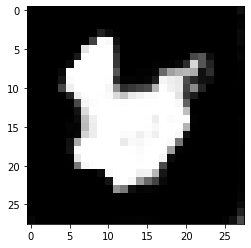

100%|██████████| 546/546 [00:39<00:00, 13.94it/s]


epoch 30 step 545 gan loss:  0.13064974546432495     discriminator acc:  1.0


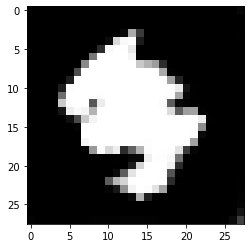

100%|██████████| 546/546 [00:39<00:00, 13.69it/s]


epoch 31 step 545 gan loss:  0.011493575759232044     discriminator acc:  0.5


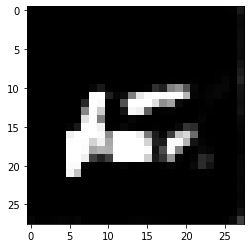

100%|██████████| 546/546 [00:39<00:00, 13.66it/s]


epoch 32 step 545 gan loss:  0.3271319270133972     discriminator acc:  1.0


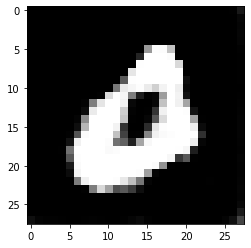

100%|██████████| 546/546 [00:38<00:00, 14.01it/s]


epoch 33 step 545 gan loss:  0.04535955190658569     discriminator acc:  0.90234375


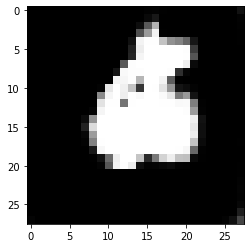

100%|██████████| 546/546 [00:38<00:00, 14.33it/s]


epoch 34 step 545 gan loss:  4.312039375305176     discriminator acc:  1.0


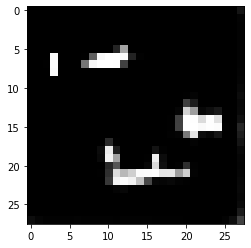

100%|██████████| 546/546 [00:38<00:00, 14.36it/s]


epoch 35 step 545 gan loss:  6.903876304626465     discriminator acc:  1.0


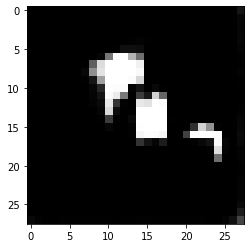

100%|██████████| 546/546 [00:37<00:00, 14.58it/s]


epoch 36 step 545 gan loss:  0.2052074670791626     discriminator acc:  0.5


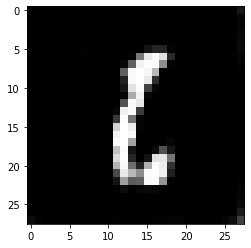

100%|██████████| 546/546 [00:38<00:00, 14.09it/s]


epoch 37 step 545 gan loss:  14.967629432678223     discriminator acc:  1.0


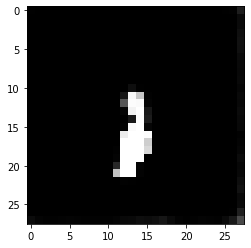

100%|██████████| 546/546 [00:39<00:00, 13.99it/s]


epoch 38 step 545 gan loss:  0.032446958124637604     discriminator acc:  0.5


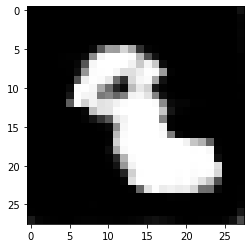

100%|██████████| 546/546 [00:39<00:00, 13.83it/s]


epoch 39 step 545 gan loss:  21.816650390625     discriminator acc:  0.9609375


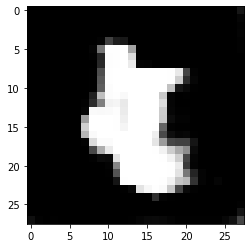

100%|██████████| 546/546 [00:38<00:00, 14.12it/s]


epoch 40 step 545 gan loss:  1.0611610377964098e-05     discriminator acc:  1.0


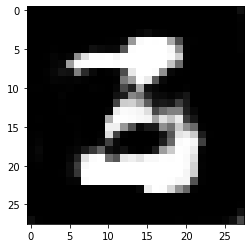

100%|██████████| 546/546 [00:38<00:00, 14.14it/s]


epoch 41 step 545 gan loss:  0.0016772022936493158     discriminator acc:  1.0


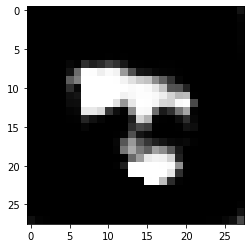

100%|██████████| 546/546 [00:39<00:00, 13.84it/s]


epoch 42 step 545 gan loss:  1.811875343322754     discriminator acc:  1.0


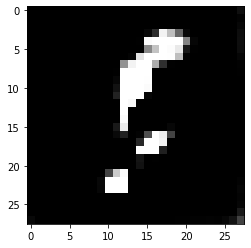

100%|██████████| 546/546 [00:39<00:00, 13.89it/s]


epoch 43 step 545 gan loss:  0.05700388550758362     discriminator acc:  0.5


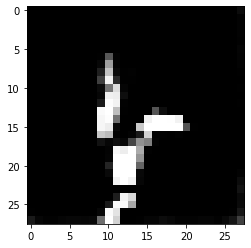

100%|██████████| 546/546 [00:39<00:00, 13.87it/s]


epoch 44 step 545 gan loss:  0.03375927731394768     discriminator acc:  1.0


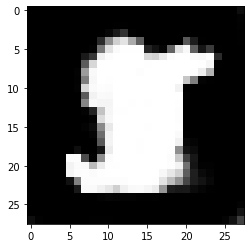

100%|██████████| 546/546 [00:39<00:00, 13.66it/s]


epoch 45 step 545 gan loss:  0.0723724365234375     discriminator acc:  0.5


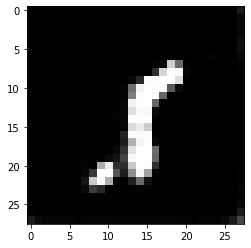

100%|██████████| 546/546 [00:39<00:00, 13.79it/s]


epoch 46 step 545 gan loss:  0.05019086226820946     discriminator acc:  1.0


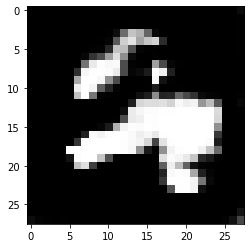

100%|██████████| 546/546 [00:38<00:00, 14.15it/s]


epoch 47 step 545 gan loss:  0.40673381090164185     discriminator acc:  0.9375


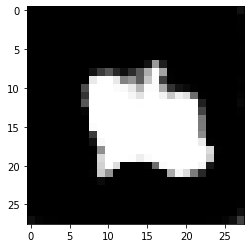

100%|██████████| 546/546 [00:37<00:00, 14.46it/s]


epoch 48 step 545 gan loss:  0.03072822466492653     discriminator acc:  0.98828125


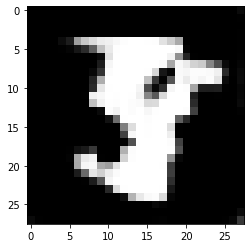

100%|██████████| 546/546 [00:37<00:00, 14.48it/s]


epoch 49 step 545 gan loss:  0.004139211494475603     discriminator acc:  0.5


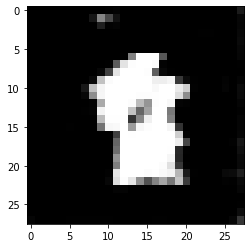

100%|██████████| 546/546 [00:38<00:00, 14.29it/s]


epoch 50 step 545 gan loss:  4.2620488843909954e-14     discriminator acc:  1.0


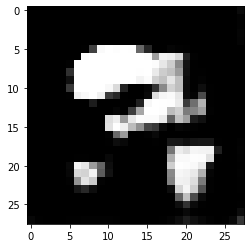

100%|██████████| 546/546 [00:38<00:00, 14.22it/s]


epoch 51 step 545 gan loss:  0.014499804005026817     discriminator acc:  0.5


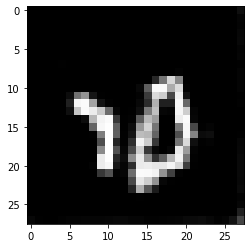

100%|██████████| 546/546 [00:37<00:00, 14.49it/s]


epoch 52 step 545 gan loss:  0.03749478608369827     discriminator acc:  1.0


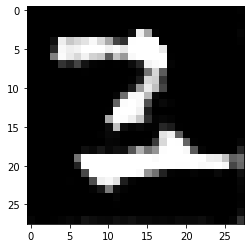

100%|██████████| 546/546 [00:37<00:00, 14.55it/s]


epoch 53 step 545 gan loss:  0.023990945890545845     discriminator acc:  0.5


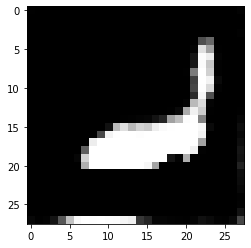

100%|██████████| 546/546 [00:36<00:00, 14.82it/s]


epoch 54 step 545 gan loss:  0.12716352939605713     discriminator acc:  0.5


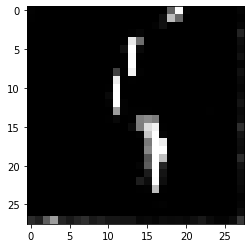

100%|██████████| 546/546 [00:37<00:00, 14.53it/s]


epoch 55 step 545 gan loss:  0.0335024893283844     discriminator acc:  0.5


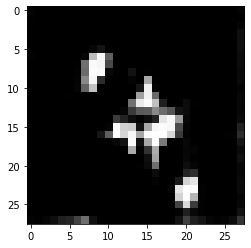

100%|██████████| 546/546 [00:37<00:00, 14.64it/s]


epoch 56 step 545 gan loss:  0.017758389934897423     discriminator acc:  0.5


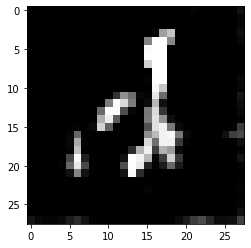

100%|██████████| 546/546 [00:37<00:00, 14.74it/s]


epoch 57 step 545 gan loss:  0.005379101727157831     discriminator acc:  1.0


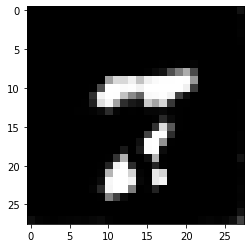

100%|██████████| 546/546 [00:37<00:00, 14.75it/s]


epoch 58 step 545 gan loss:  0.11999073624610901     discriminator acc:  1.0


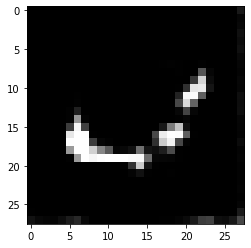

100%|██████████| 546/546 [00:36<00:00, 14.79it/s]


epoch 59 step 545 gan loss:  0.012115821242332458     discriminator acc:  1.0


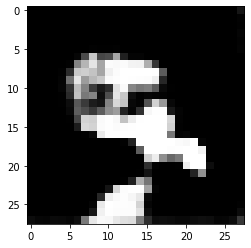

100%|██████████| 546/546 [00:37<00:00, 14.44it/s]


epoch 60 step 545 gan loss:  0.009507700800895691     discriminator acc:  0.5


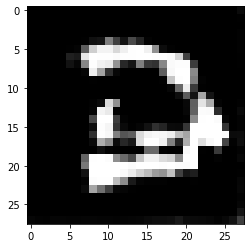

100%|██████████| 546/546 [00:38<00:00, 14.27it/s]


epoch 61 step 545 gan loss:  0.9917024374008179     discriminator acc:  1.0


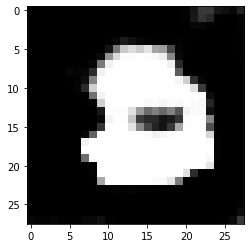

100%|██████████| 546/546 [00:38<00:00, 14.12it/s]


epoch 62 step 545 gan loss:  0.0003083874471485615     discriminator acc:  1.0


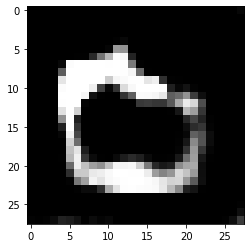

100%|██████████| 546/546 [00:38<00:00, 14.34it/s]


epoch 63 step 545 gan loss:  0.17855408787727356     discriminator acc:  1.0


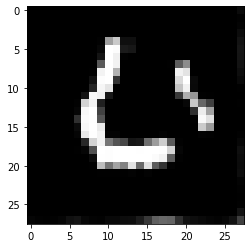

100%|██████████| 546/546 [00:37<00:00, 14.49it/s]


epoch 64 step 545 gan loss:  0.0075960587710142136     discriminator acc:  0.5


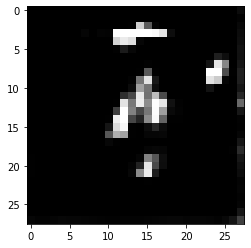

100%|██████████| 546/546 [00:38<00:00, 14.20it/s]


epoch 65 step 545 gan loss:  0.00715439161285758     discriminator acc:  0.5


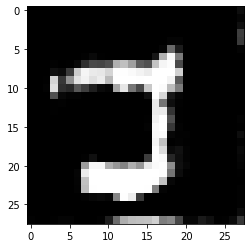

100%|██████████| 546/546 [00:37<00:00, 14.41it/s]


epoch 66 step 545 gan loss:  0.004172916058450937     discriminator acc:  0.5


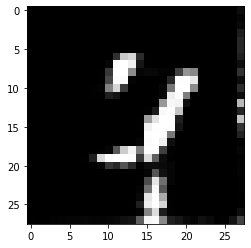

100%|██████████| 546/546 [00:38<00:00, 14.33it/s]


epoch 67 step 545 gan loss:  13.953910827636719     discriminator acc:  0.921875


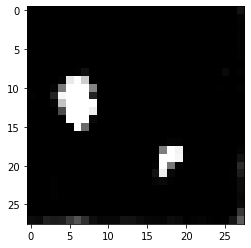

100%|██████████| 546/546 [00:37<00:00, 14.43it/s]


epoch 68 step 545 gan loss:  3.966804797528312e-06     discriminator acc:  0.5


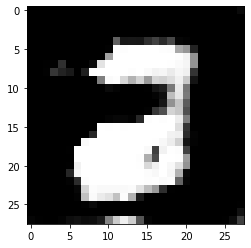

100%|██████████| 546/546 [00:37<00:00, 14.49it/s]


epoch 69 step 545 gan loss:  20.369537353515625     discriminator acc:  0.9609375


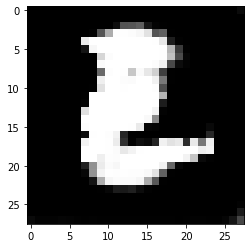

100%|██████████| 546/546 [00:37<00:00, 14.47it/s]


epoch 70 step 545 gan loss:  0.55158531665802     discriminator acc:  1.0


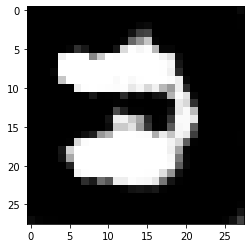

100%|██████████| 546/546 [00:38<00:00, 14.37it/s]


epoch 71 step 545 gan loss:  0.0031696269288659096     discriminator acc:  0.5


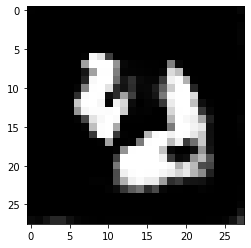

100%|██████████| 546/546 [00:39<00:00, 13.86it/s]


epoch 72 step 545 gan loss:  0.023802030831575394     discriminator acc:  1.0


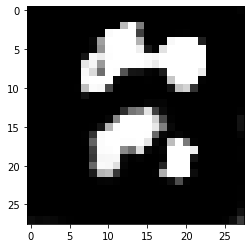

100%|██████████| 546/546 [00:37<00:00, 14.46it/s]


epoch 73 step 545 gan loss:  0.41671985387802124     discriminator acc:  1.0


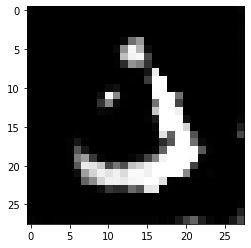

100%|██████████| 546/546 [00:38<00:00, 14.29it/s]


epoch 74 step 545 gan loss:  13.180484771728516     discriminator acc:  1.0


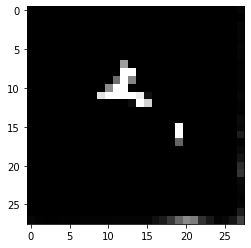

100%|██████████| 546/546 [00:37<00:00, 14.58it/s]


epoch 75 step 545 gan loss:  0.0027731461450457573     discriminator acc:  1.0


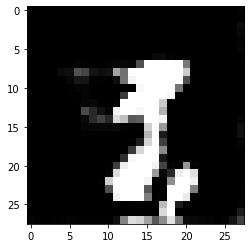

100%|██████████| 546/546 [00:37<00:00, 14.40it/s]


epoch 76 step 545 gan loss:  7.213149070739746     discriminator acc:  0.98828125


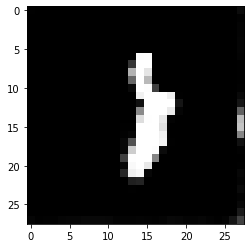

100%|██████████| 546/546 [00:37<00:00, 14.56it/s]


epoch 77 step 545 gan loss:  0.026464276015758514     discriminator acc:  0.5


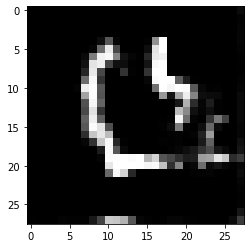

100%|██████████| 546/546 [00:37<00:00, 14.66it/s]


epoch 78 step 545 gan loss:  19.21177101135254     discriminator acc:  0.98046875


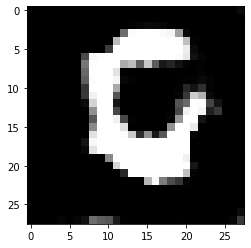

100%|██████████| 546/546 [00:37<00:00, 14.64it/s]


epoch 79 step 545 gan loss:  0.06699661910533905     discriminator acc:  0.5


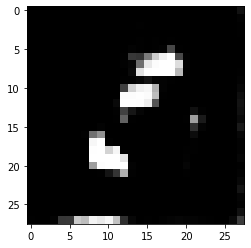

100%|██████████| 546/546 [00:38<00:00, 14.26it/s]


epoch 80 step 545 gan loss:  0.004664116073399782     discriminator acc:  0.5


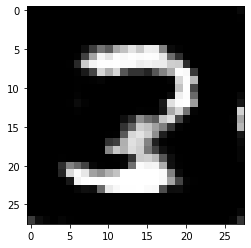

100%|██████████| 546/546 [00:38<00:00, 14.11it/s]


epoch 81 step 545 gan loss:  0.022198719903826714     discriminator acc:  1.0


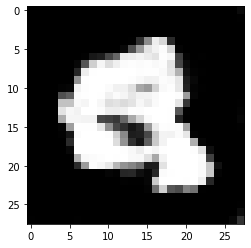

100%|██████████| 546/546 [00:39<00:00, 13.88it/s]


epoch 82 step 545 gan loss:  0.02438802644610405     discriminator acc:  0.5


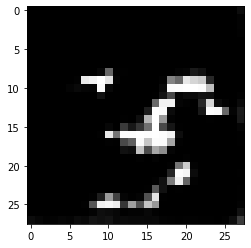

100%|██████████| 546/546 [00:38<00:00, 14.27it/s]


epoch 83 step 545 gan loss:  0.012978022918105125     discriminator acc:  1.0


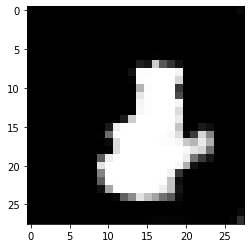

100%|██████████| 546/546 [00:38<00:00, 14.03it/s]


epoch 84 step 545 gan loss:  0.12121802568435669     discriminator acc:  0.5


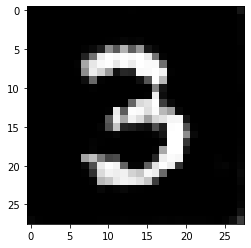

100%|██████████| 546/546 [00:38<00:00, 14.32it/s]


epoch 85 step 545 gan loss:  1.5346225500106812     discriminator acc:  1.0


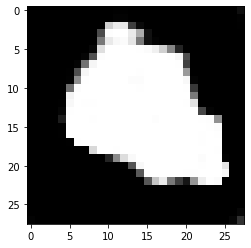

100%|██████████| 546/546 [00:37<00:00, 14.47it/s]


epoch 86 step 545 gan loss:  0.022434622049331665     discriminator acc:  0.5


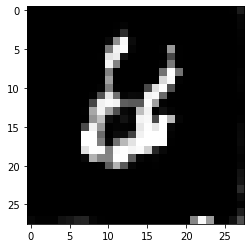

100%|██████████| 546/546 [00:37<00:00, 14.55it/s]


epoch 87 step 545 gan loss:  0.017719658091664314     discriminator acc:  0.5


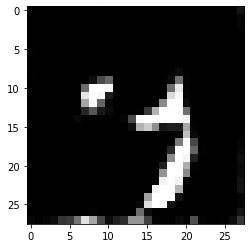

100%|██████████| 546/546 [00:38<00:00, 14.20it/s]


epoch 88 step 545 gan loss:  0.0923890620470047     discriminator acc:  0.5


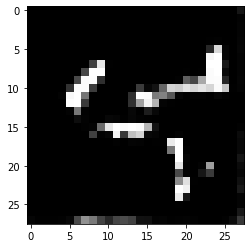

100%|██████████| 546/546 [00:37<00:00, 14.39it/s]


epoch 89 step 545 gan loss:  9.607165336608887     discriminator acc:  1.0


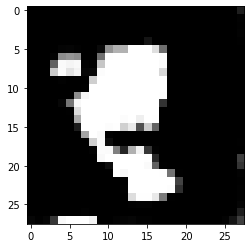

100%|██████████| 546/546 [00:37<00:00, 14.42it/s]


epoch 90 step 545 gan loss:  0.8979949355125427     discriminator acc:  1.0


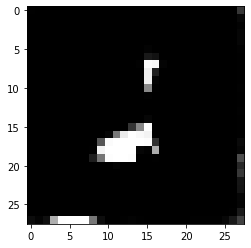

100%|██████████| 546/546 [00:37<00:00, 14.44it/s]


epoch 91 step 545 gan loss:  0.007152354810386896     discriminator acc:  1.0


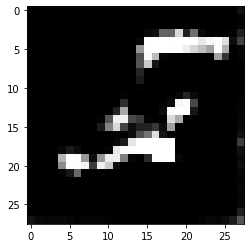

100%|██████████| 546/546 [00:39<00:00, 13.96it/s]


epoch 92 step 545 gan loss:  0.0029586749151349068     discriminator acc:  0.5


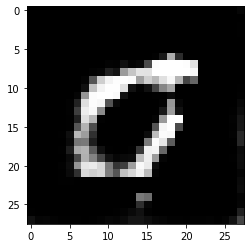

100%|██████████| 546/546 [00:37<00:00, 14.42it/s]


epoch 93 step 545 gan loss:  0.016519250348210335     discriminator acc:  1.0


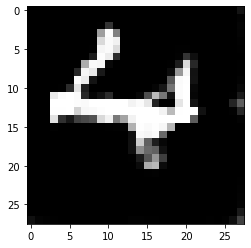

100%|██████████| 546/546 [00:38<00:00, 14.26it/s]


epoch 94 step 545 gan loss:  0.01809154823422432     discriminator acc:  1.0


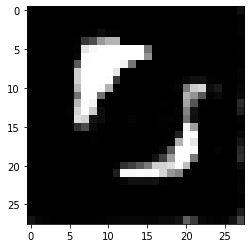

100%|██████████| 546/546 [00:37<00:00, 14.40it/s]


epoch 95 step 545 gan loss:  0.0032814808655530214     discriminator acc:  0.7578125


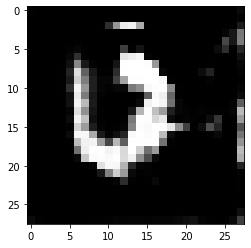

100%|██████████| 546/546 [00:38<00:00, 14.12it/s]


epoch 96 step 545 gan loss:  0.5131533741950989     discriminator acc:  0.47265625


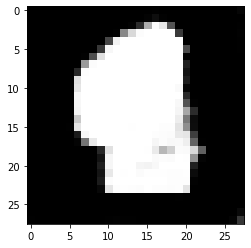

100%|██████████| 546/546 [00:39<00:00, 13.83it/s]


epoch 97 step 545 gan loss:  0.006912281271070242     discriminator acc:  1.0


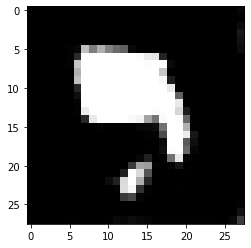

100%|██████████| 546/546 [00:38<00:00, 14.17it/s]


epoch 98 step 545 gan loss:  0.050635308027267456     discriminator acc:  0.5


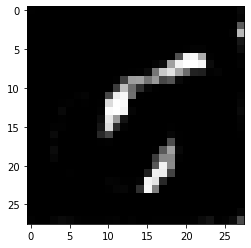

100%|██████████| 546/546 [00:38<00:00, 14.07it/s]


epoch 99 step 545 gan loss:  0.005347294732928276     discriminator acc:  0.5


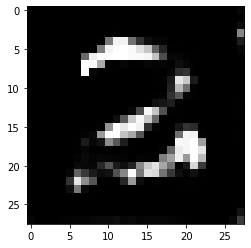

100%|██████████| 546/546 [00:38<00:00, 14.06it/s]


epoch 100 step 545 gan loss:  0.006988842971622944     discriminator acc:  1.0


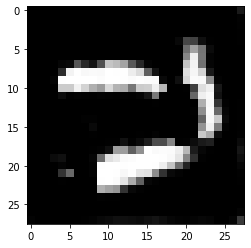

100%|██████████| 546/546 [00:39<00:00, 13.94it/s]


epoch 101 step 545 gan loss:  6.912939071655273     discriminator acc:  1.0


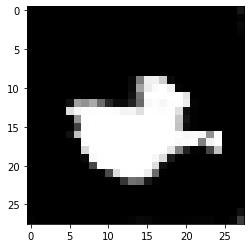

100%|██████████| 546/546 [00:38<00:00, 14.25it/s]


epoch 102 step 545 gan loss:  12.57325553894043     discriminator acc:  1.0


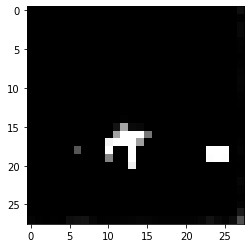

100%|██████████| 546/546 [00:38<00:00, 14.33it/s]


epoch 103 step 545 gan loss:  8.19637393951416     discriminator acc:  1.0


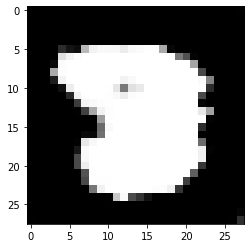

100%|██████████| 546/546 [00:38<00:00, 14.19it/s]


epoch 104 step 545 gan loss:  0.029040781781077385     discriminator acc:  1.0


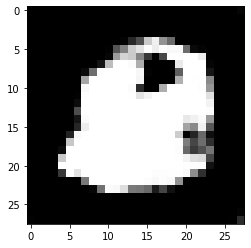

100%|██████████| 546/546 [00:38<00:00, 14.29it/s]


epoch 105 step 545 gan loss:  0.001617936184629798     discriminator acc:  0.72265625


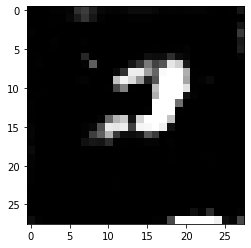

100%|██████████| 546/546 [00:38<00:00, 14.12it/s]


epoch 106 step 545 gan loss:  0.001005333848297596     discriminator acc:  0.96875


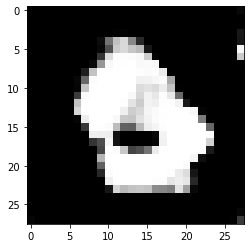

100%|██████████| 546/546 [00:38<00:00, 14.01it/s]


epoch 107 step 545 gan loss:  0.00470400508493185     discriminator acc:  1.0


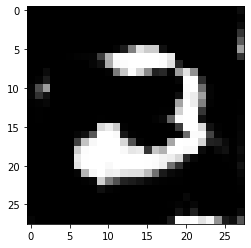

100%|██████████| 546/546 [00:38<00:00, 14.01it/s]


epoch 108 step 545 gan loss:  0.018992125988006592     discriminator acc:  1.0


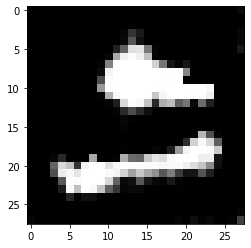

100%|██████████| 546/546 [00:37<00:00, 14.40it/s]


epoch 109 step 545 gan loss:  0.00297374976798892     discriminator acc:  1.0


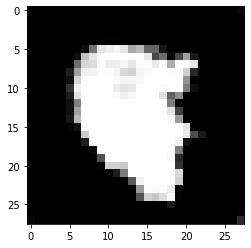

In [79]:
for e in range(epochs):
  for step in tqdm(range(steps_per_epoch)):
    true_examples = digits[int(batch_size/2)*step:int(batch_size/2)*(step+1)]
    true_examples = np.reshape(true_examples, (true_examples.shape[0], 28, 28, 1))

    noise = np.random.randn(int(batch_size/2), 1) * 2 - 1
    fake_examples = generator.predict(noise)

    x_batch = np.concatenate([fake_examples, true_examples], axis=0)
    y_batch = np.array([0]*int(batch_size/2) + [1]*int(batch_size/2))

    indices = np.random.choice(range(batch_size), batch_size, replace=False)

    x_batch = x_batch[indices]
    y_batch = y_batch[indices]

    discriminator.trainable = True
    discriminator.train_on_batch(x_batch, y_batch)
    discriminator.trainable = False

    loss, _ = gan.train_on_batch(noise, np.ones((int(batch_size /2),1)))
  _, acc = discriminator.evaluate(x_batch, y_batch, verbose=False)

  print(f'epoch {e+10} step {step}', 'gan loss: ', loss, '    discriminator acc: ', acc)

  noise = np.random.randn(1, 1)
  gen = generator.predict(noise)[0]
  gen = np.reshape(gen, (28, 28))

  plt.figure()
  plt.imshow(gen, cmap='gray')
  plt.show()
  if e % 10 == 0:
    generator.save_weights(f'/content/drive/MyDrive/generator_{e+10}.h5')
    discriminator.save_weights(f'/content/drive/MyDrive/discriminator_{e+10}.h5')

In [59]:
generator.save_weights('/content/drive/MyDrive/generator_0.h5')
discriminator.save_weights('/content/drive/MyDrive/discriminator_0.h5')

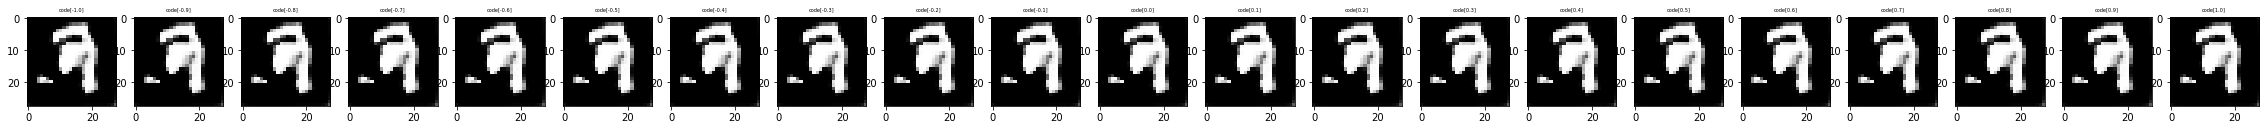

<Figure size 432x288 with 0 Axes>

In [60]:
fig, axs = plt.subplots(1, 21, figsize=(40,2))
for i in range(21):
    z = float((i-10) / 10)
    noise = np.array([[z]])
    fake = generator.predict(noise)[0]
    fake = fake.reshape((28, 28))
    axs[i].imshow(fake, cmap="Greys_r")
    axs[i].set_title(f'code[{z}]', size=5)
plt.show()
plt.savefig('epoch1.jpg')

# **VAE**

In [61]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K

In [62]:
class Sample(layers.Layer):
    def call(self, mean, var):
        print('get_shape func: ', mean.get_shape())
        print('tf.shape func: ', tf.shape(mean)[0], tf.shape(mean)[1])
        batch = tf.shape(mean)[0]
        dim =  tf.shape(mean)[1]

        epsilon = K.random_normal(shape=(batch,dim))

        return mean + tf.exp(0.5 * var) * epsilon

In [63]:
latent_dim = 2
encoder_inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation='relu')(x)

mean = layers.Dense(latent_dim, name='mean')(x)
var = layers.Dense(latent_dim, name='var')(x)
code = Sample(name = 'code')(mean, var)

get_shape func:  (None, 2)
tf.shape func:  Tensor("code/strided_slice:0", shape=(), dtype=int32) Tensor("code/strided_slice_1:0", shape=(), dtype=int32)


In [64]:
encoder = keras.models.Model(encoder_inputs, [mean, var, code], name='encoder')


In [65]:
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 14, 14, 32)   320         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 7, 7, 64)     18496       conv2d_6[0][0]                   
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 3136)         0           conv2d_7[0][0]                   
____________________________________________________________________________________________

In [66]:
decoder_inputs = layers.Input(shape=(latent_dim, ))

x = layers.Dense(7*7*64, activation='relu')(decoder_inputs)
x = layers.Reshape((7,7,64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)
decoder = keras.models.Model(decoder_inputs, x, name='decoder')

In [67]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_12 (Conv2DT (None, 28, 28, 1)         289       
Total params: 65,089
Trainable params: 65,089
Non-trainable params: 0
_______________________________________________________

In [68]:
# build a custom model
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)

        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = encoder(data)
            reconstruction = decoder(z)
            reconstruction_loss = K.mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            reconstruction_loss *= 28 * 28
            kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
            kl_loss = K.mean(kl_loss)
            kl_loss *= -0.5
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

In [69]:
(train, _), (test,_) = keras.datasets.mnist.load_data()

digits = np.concatenate([train, test], axis=0)
digits = np.expand_dims(digits, -1).astype('float32') / 255

In [70]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

In [71]:
vae.fit(digits, epochs=30, batch_size=128)

Epoch 1/30
get_shape func:  (None, 2)
tf.shape func:  Tensor("encoder/code/strided_slice:0", shape=(), dtype=int32) Tensor("encoder/code/strided_slice_1:0", shape=(), dtype=int32)
get_shape func:  (None, 2)
tf.shape func:  Tensor("encoder/code/strided_slice:0", shape=(), dtype=int32) Tensor("encoder/code/strided_slice_1:0", shape=(), dtype=int32)
547/547 [==============================] - 3s 6ms/step - loss: 214.4934 - reconstruction_loss: 212.8109 - kl_loss: 1.6825
Epoch 2/30
547/547 [==============================] - 4s 7ms/step - loss: 187.6529 - reconstruction_loss: 185.5592 - kl_loss: 2.0937
Epoch 3/30
547/547 [==============================] - 4s 7ms/step - loss: 183.2154 - reconstruction_loss: 181.0948 - kl_loss: 2.1206
Epoch 4/30
547/547 [==============================] - 4s 7ms/step - loss: 181.3029 - reconstruction_loss: 179.1644 - kl_loss: 2.1385
Epoch 5/30
547/547 [==============================] - 3s 6ms/step - loss: 179.8673 - reconstruction_loss: 177.7204 - kl_loss: 2.14

In [74]:
vae.save_weights('/content/drive/MyDrive/vae.h5')

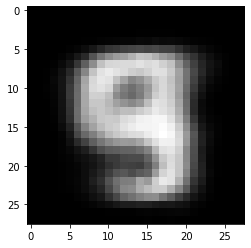

In [72]:
code = np.array([[0.1, -0.5]])
fake = decoder.predict(code)[0]
fake = fake.reshape((28, 28))
plt.imshow(fake, cmap="Greys_r")
plt.show()

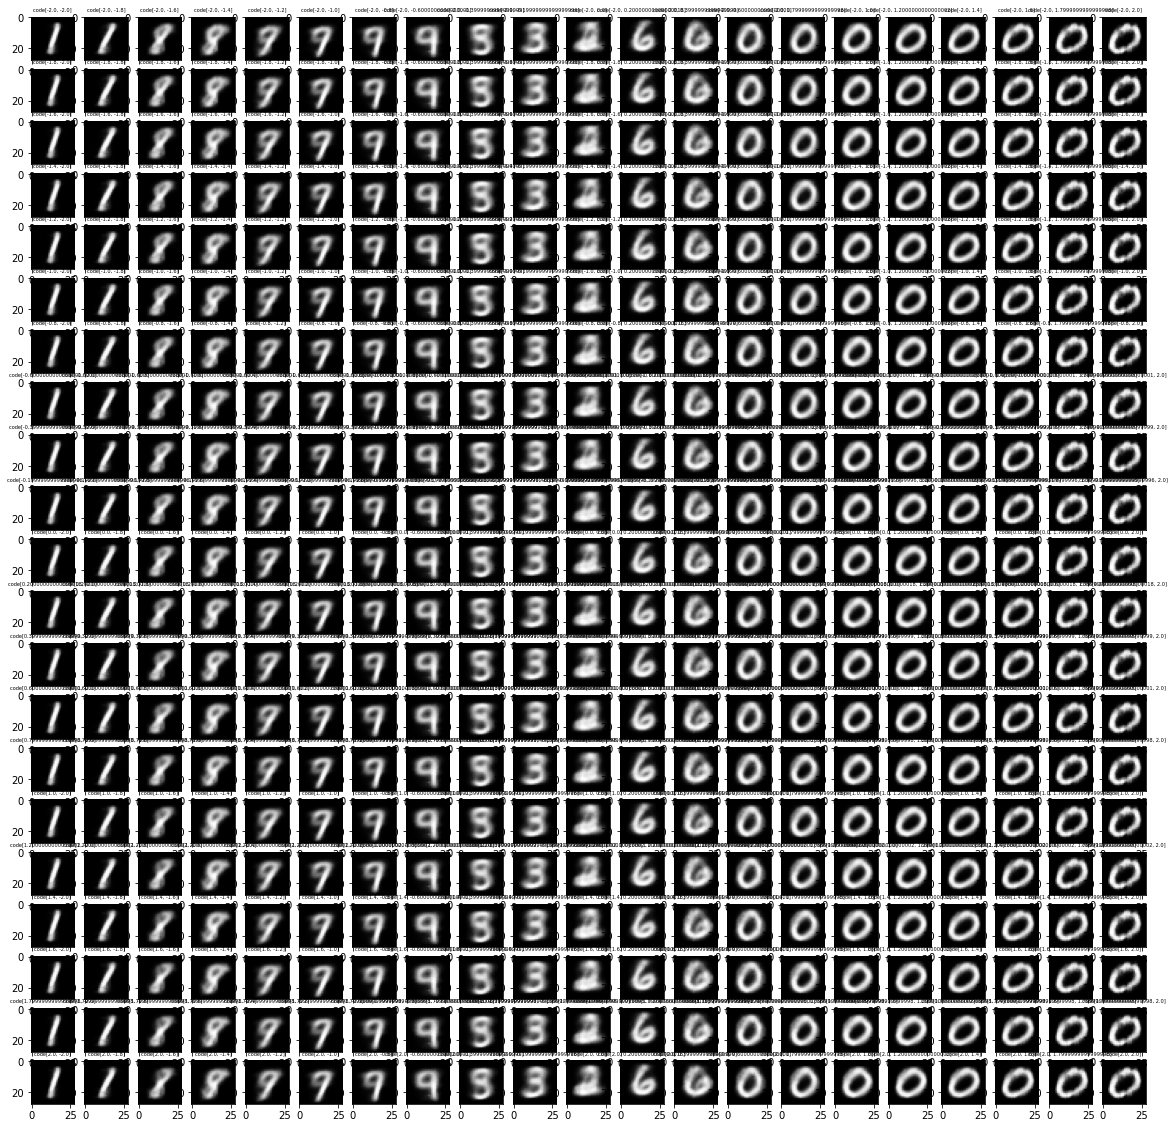

In [73]:
fig, axs = plt.subplots(21, 21, figsize=(20,20))
for i in range(21):
  for j in range(21):
    x, y = (i / 5) - 2, (j / 5) - 2
    code = np.array([[x, y]])
    fake = decoder.predict(code)[0]
    fake = fake.reshape((28, 28))
    axs[i, j].imshow(fake, cmap="Greys_r")
    axs[i, j].set_title(f'code[{x}, {y}]', size=5)
plt.show()